In [ ]:
#Kriging Implementation using the Surrogate Model Toolbox. Kriging is a special case of Gaussian Process Regression 
#in which input points that are close are assumed to have output points that are also close to each other.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import pandas as pd
from smt.surrogate_models import KRG

C:\Users\jmadinn\AppData\Local\Temp\ipykernel_23632\1936343069.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
fineSpringConstants = pd.read_csv("fineSpringParameters.csv",header=None)

In [3]:
timesteps = pd.read_csv("timesteps.csv",header=None)

In [4]:
coarseSpringConstants = np.arange(0.1,51.1,5)
mediumSpringConstants = np.arange(0.1,51.1,1)

In [5]:
fineDisplacements = pd.read_csv("fineDisplacements.csv",header=None)

In [6]:
fineDisplacements.set_index(fineSpringConstants.to_numpy().squeeze(),inplace=True)

In [7]:
fineDisplacements.columns = timesteps.to_numpy().squeeze()

In [8]:
coarseDisplacements = fineDisplacements.loc[coarseSpringConstants]

In [9]:
mediumDisplacements = fineDisplacements.loc[mediumSpringConstants]

In [10]:
inputFeatures = np.meshgrid(timesteps, coarseSpringConstants)

In [11]:
xt = np.stack((inputFeatures[1],inputFeatures[0]),axis=-1).reshape((-1,2))

In [12]:
xt.shape

(6611, 2)

In [13]:
yt = coarseDisplacements.to_numpy().flatten()

In [14]:
yt.shape

(6611,)

In [ ]:
sm = KRG(theta0 = [1e-2])
sm.set_training_values(xt,yt)
sm.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 6611
   
___________________________________________________________________________
   
 Training
   
   Training ...
exception :  1055-th leading minor of the array is not positive definite
[6.35627949e+03+0.00000000e+00j 1.25087108e+02+0.00000000e+00j
 1.25135658e+02+0.00000000e+00j ... 2.20846126e-14-2.33261038e-16j
 2.19332944e-14+7.19911874e-17j 2.19332944e-14-7.19911874e-17j]
exception :  1035-th leading minor of the array is not positive definite
[6.10562610e+03+0.00000000e+00j 3.67441482e+02+0.00000000e+00j
 1.20154426e+02+0.00000000e+00j ... 2.17034190e-14+0.00000000e+00j
 2.19398837e-14+4.84719045e-17j 2.19398837e-14-4.84719045e-17j]
exception :  1018-th leading minor of the array is not positive definite
[6.10580458e+03+0.j 

In [ ]:
gridx = np.arange(0.0, 61,0.1)
gridy = np.arange(1,50,0.2)

In [ ]:
y = sm.predict_values(x)
s2= sm.predict_variances(x)

In [11]:
gridX,gridY = np.meshgrid(gridx,gridy) 

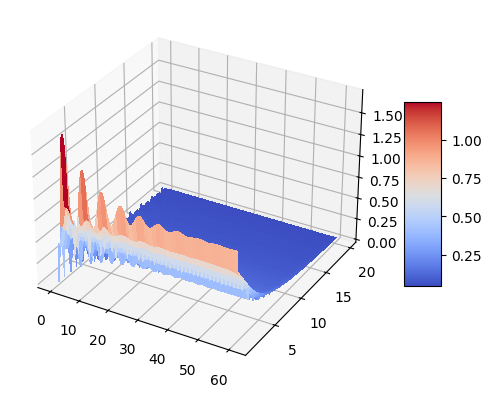

In [13]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#fig = plt.figure()
#ax = Axes3D(fig)
surf = ax.plot_surface(gridX, gridY, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#plt.imshow(z)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()